In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
path="/lustre/ytzheng/"
# path="C:/data/SAM_cases/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
f

<xarray.Dataset>
Dimensions:               (time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(90,), me

In [4]:
f = f.isel(time = slice(0,61))
f1 = f1.isel(time = slice(0,61))
nt = f['time'].size
t_hours = np.arange(nt)

z = f['z']/1000.

myfontsize = 12

In [5]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], cbar = False, xlabel = False, ylabel = False, out = False):
    if len(mylevels) == 1:
#         norm = cm.colors.BoundaryNorm(mylevels,256)
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', shrink=1.)
        cbar.set_label(ztitle, fontsize=myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim([0, 60])
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

In [6]:
mylevels = np.linspace(284, 300, 16 + 1)
print(mylevels.max())

300.0


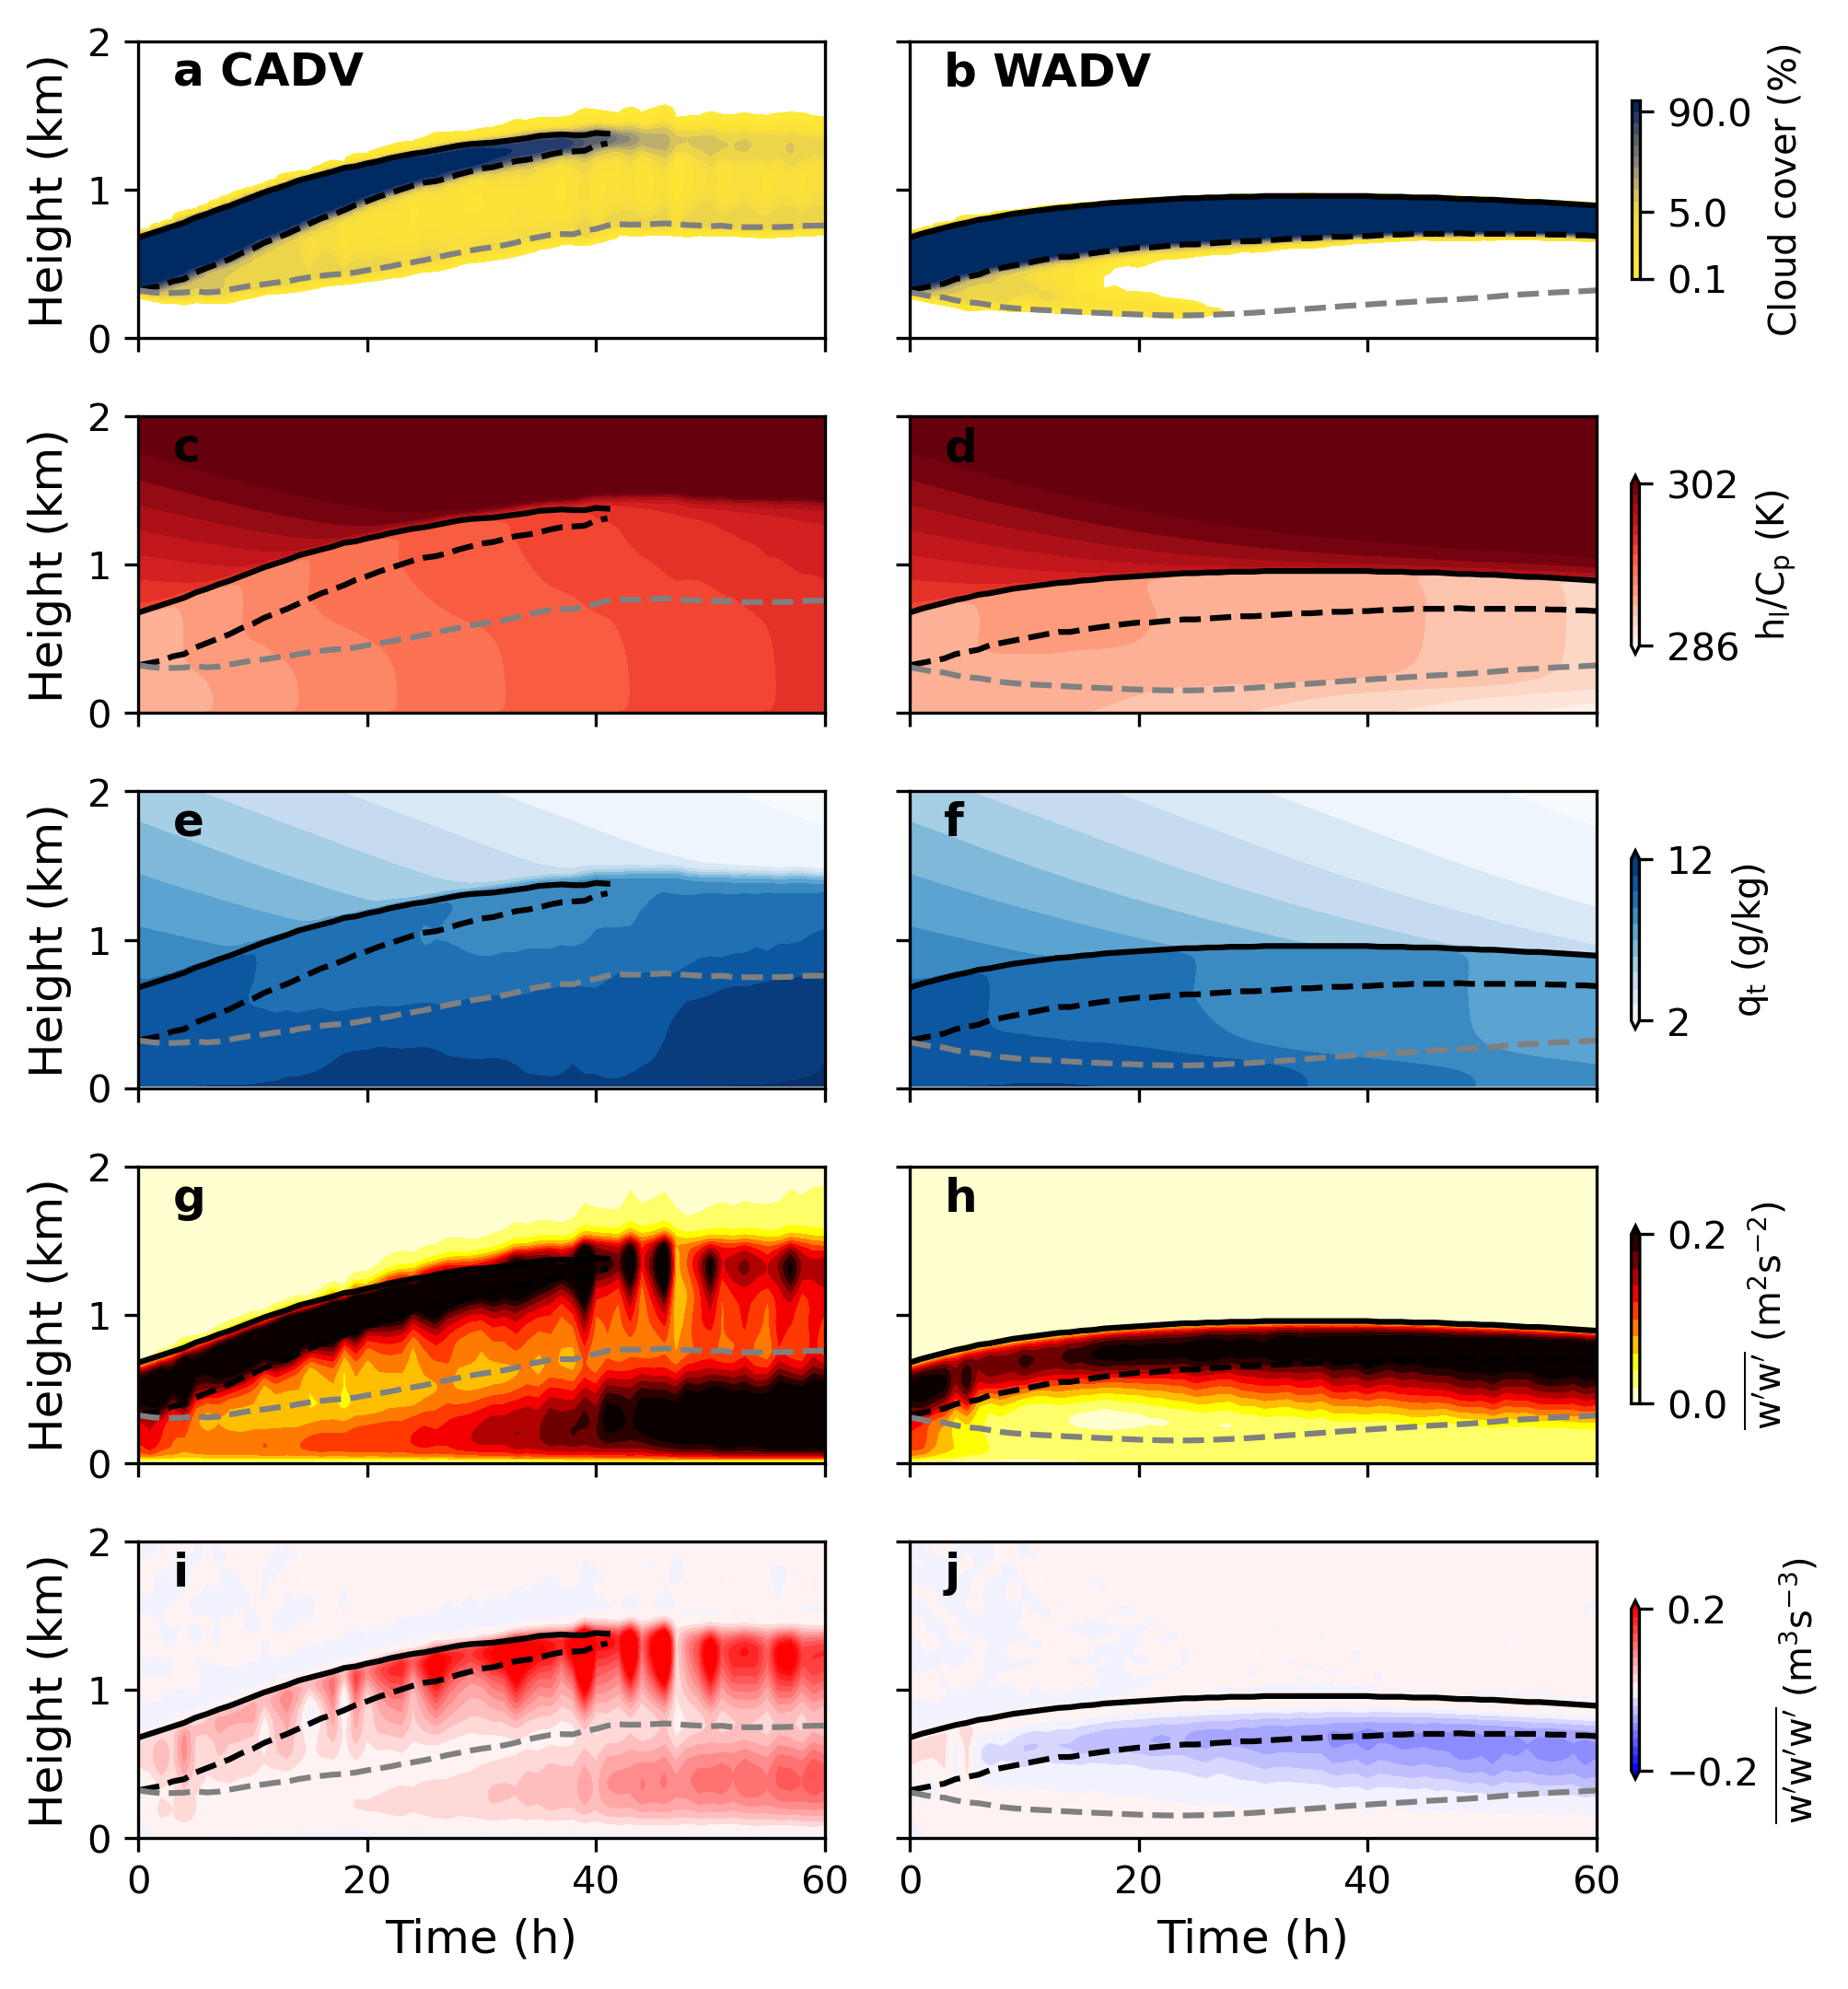

In [10]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 5,
                        sharex = True, sharey = True,
                        figsize=(18/2.54, (18)/2.54), dpi = 300)
plt.tight_layout()

#
mylevels = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt2D(fig, axs[0,0], t_hours, z, 100.*f['CLD'].T, 'Cloud cover (%)', mycmap=cm.cividis_r, 
      mylevels=mylevels, ylabel = True)
oax = plt2D(fig, axs[0,1], t_hours, z, 100.*f1['CLD'].T, 'Cloud cover (%)', mycmap=cm.cividis_r,
            mylevels=mylevels, out = True)

cbar = fig.colorbar(oax,  ax=axs[0], orientation='vertical', shrink=0.6,
                    ticks = [0.1, 5., 90],
                    pad=0.02)
cbar.set_label(r"$\mathrm{Cloud \ cover}$ (%)", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(286, 302, 16 + 1)

plt2D(fig, axs[1,0], t_hours, z, f['TL'].T, 'TL (K)', mycmap=cm.Reds, mylevels=mylevels, extend='both', 
      ylabel = True)
oax = plt2D(fig, axs[1,1], t_hours, z, f1['TL'].T, 'TL (K)', mycmap=cm.Reds, mylevels=mylevels,
            extend='both', out = True)

cbar = fig.colorbar(oax,  ax=axs[1], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{h_l/C_p \ (K)}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(2, 12, 10 + 1)

plt2D(fig, axs[2,0], t_hours, z, f['QT'].T, 'QT (g/kg)', mycmap=cm.Blues, mylevels=mylevels, extend='both', 
      ylabel = True)
oax = plt2D(fig, axs[2,1], t_hours, z, f1['QT'].T, 'QT (g/kg)', mycmap=cm.Blues, mylevels=mylevels, 
      extend='both', out = True)

cbar = fig.colorbar(oax,  ax=axs[2], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{q_t \ (g/kg)}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(0, 0.2, 10 + 1)

plt2D(fig, axs[3,0], t_hours, z, f['W2'].T, 'W2 (m2/s2)', mycmap=cm.hot_r, mylevels=mylevels, extend='max',
     ylabel = True)
oax =plt2D(fig, axs[3,1], t_hours, z, f1['W2'].T, 'W2 (m2/s2)', mycmap=cm.hot_r, mylevels=mylevels, 
      extend='max', out = True)

cbar = fig.colorbar(oax,  ax=axs[3], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{\overline{w^{\prime}w^{\prime}} \ (m^2s^{-2})}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(-0.2, 0.2, 20 + 1)

plt2D(fig, axs[4, 0], t_hours, z, f['W3'].T, 'W3 (m3/s3)', mycmap=cm.bwr, mylevels=mylevels, extend='both',
     ylabel = True, xlabel = True)
oax =plt2D(fig, axs[4, 1], t_hours, z, f1['W3'].T, 'W3 (m3/s3)', mycmap=cm.bwr, mylevels=mylevels, extend='both',
     xlabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[4], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{\overline{w^{\prime}w^{\prime}w^{\prime}} \ (m^3s^{-3})}$", fontsize=0.8*myfontsize)

mylabel = np.array((['a CADV','b WADV'],['c','d'], ['e','f'], ['g','h'], ['i','j']))

for i in range(5):
    axs[i, 0].plot(t_hours, f['zct']/1000., color = 'black')
    axs[i, 0].plot(t_hours, f['zcb']/1000., color = 'black', linestyle = '--')
    axs[i, 0].plot(t_hours, f['lcl_out'], color = 'grey', linestyle = '--')

    axs[i, 1].plot(t_hours, f1['zct']/1000., color = 'black')
    axs[i, 1].plot(t_hours, f1['zcb']/1000., color = 'black', linestyle = '--')
    axs[i, 1].plot(t_hours, f1['lcl_out'], color = 'grey', linestyle = '--')

    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

fig.savefig('plot_result_height_time.png', dpi=fig.dpi, bbox_inches='tight')